### Maze intersection

In [153]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

maze_image = cv.imread('images/maze.png')

In [154]:
point_one = (100, 100)
point_two = (800, 500)
thickness = 3

In [155]:
maze_image.shape

(545, 1000, 3)

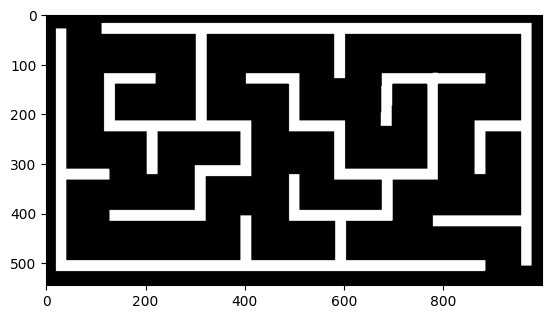

In [156]:
imgray = cv.cvtColor(maze_image, cv.COLOR_BGR2GRAY)
_, t_maze = cv.threshold(imgray, 127, 255, cv.THRESH_BINARY_INV)
plt.imshow(t_maze, cmap='binary_r')
plt.show()

In [157]:
t_maze

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [158]:
np.max(t_maze)

255

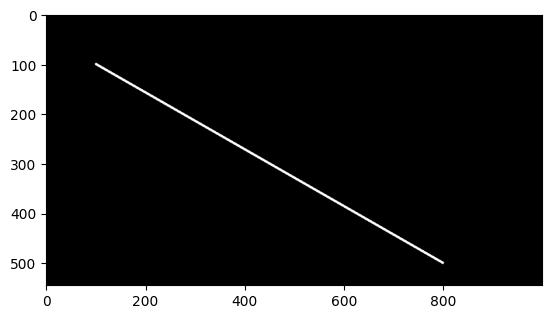

In [159]:
blank = np.zeros(maze_image.shape[:2], dtype='uint8')
line = cv.line(blank, point_one, point_two, color=255, thickness=thickness)
plt.imshow(line, cmap='binary_r')
plt.show()

In [160]:
np.max(line)

255

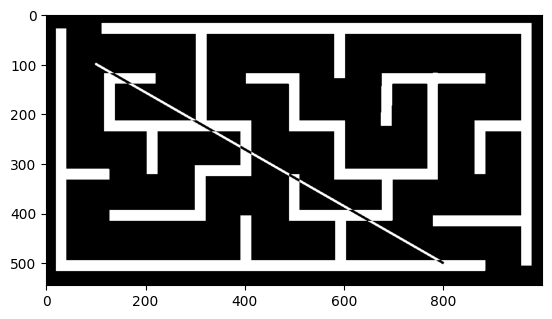

In [161]:
xr = line ^ t_maze
plt.imshow(xr, cmap='binary_r')
plt.show()

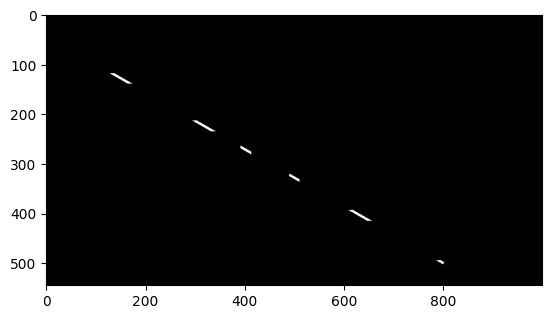

In [162]:
common = line & t_maze
plt.imshow(common, cmap='binary_r')
plt.show()

In [163]:
intersection = np.argwhere(common > 0)

In [164]:
translated = []
r_point = (point_one[1], point_one[0])
for inter in intersection:
    (dy, dx) = inter - r_point
    translated.append((dx**2 + dy**2, dy, dx))

In [165]:
srt = sorted(translated)
touch_point = (translated[0][2], translated[0][1])
translated[0]

(1202, 19, 29)

(129, 119)


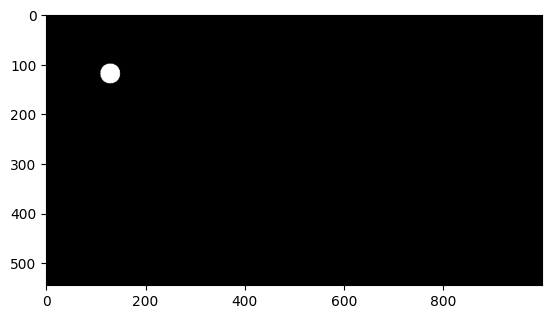

In [166]:
blank = np.zeros(maze_image.shape[:2], dtype='uint8')
center = (translated[0][2] + point_one[0], translated[0][1] + point_one[1])
print(center)
circle = cv.circle(blank, center, radius=20, color=255, thickness=-1)
plt.imshow(circle, cmap='binary_r')
plt.show()

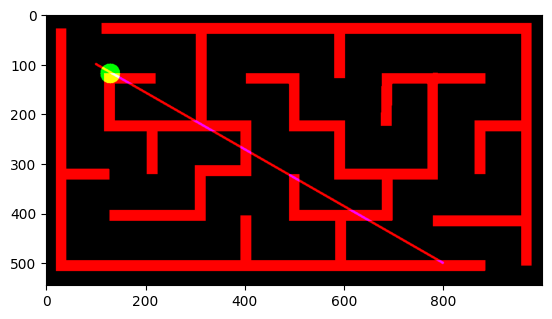

In [167]:
res = np.dstack(((t_maze | line), circle, common))
plt.imshow(res)
plt.show()

In [168]:
touch_point

(29, 19)

### Ray generation

In [203]:
grd = (800, 800)
center = (400, 400)
num_ray = 12

In [204]:
angles = []
for i in range(12):
    angles.append(i * (360 // 12))
angles = np.radians(angles)
print(angles)

vec = np.zeros((12, 2), dtype='int')
vec[:, 0] = np.cos(angles) * 100 + center[0]
vec[:, 1] = np.sin(angles) * 100 + center[1]

[0.         0.52359878 1.04719755 1.57079633 2.0943951  2.61799388
 3.14159265 3.66519143 4.1887902  4.71238898 5.23598776 5.75958653]


In [205]:
vec[1]

array([486, 450])

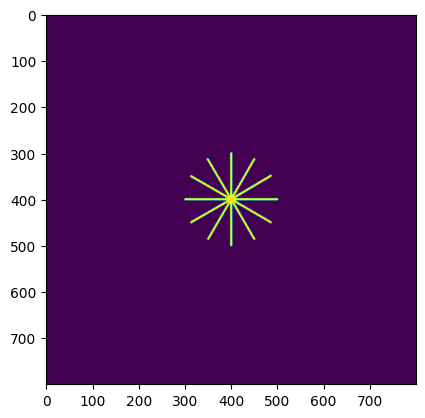

In [206]:
img = np.zeros((800, 800), dtype='uint8')
for v in vec:
    img = cv.line(img, center, (v[0], v[1]), color=255, thickness=thickness)
plt.imshow(img)
plt.show()